In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer
from tensorflow.keras.regularizers import l1, l2, L1L2

from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'C://Users//jkim436//Downloads//compressed_images'

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Set as training data
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  
    shuffle=False
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer

model = Sequential([
    InputLayer(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l1(0.01)),  # L1 regularization on the convolutional layer
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.01)),  # Continuing with L1 regularization
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1(0.01)),  # And here
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization on the dense layer
    Dense(199, activation='softmax', kernel_regularizer=l2(0.001))  # L2 regularization on the output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Found 49329 images belonging to 199 classes.
Found 21011 images belonging to 199 classes.
Found 6935 images belonging to 199 classes.
Epoch 1/30


C:\Users\jkim436\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1542/1542 ━━━━━━━━━━━━━━━━━━━━ 320s 204ms/step - accuracy: 0.0074 - loss: 7.8051 - val_accuracy: 0.0087 - val_loss: 5.3751
Epoch 2/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 267s 173ms/step - accuracy: 0.0089 - loss: 5.3773 - val_accuracy: 0.0087 - val_loss: 5.3693
Epoch 3/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 349s 226ms/step - accuracy: 0.0091 - loss: 5.3692 - val_accuracy: 0.0082 - val_loss: 5.3679
Epoch 4/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 366s 237ms/step - accuracy: 0.0084 - loss: 5.3686 - val_accuracy: 0.0087 - val_loss: 5.3657
Epoch 5/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 558s 361ms/step - accuracy: 0.0072 - loss: 5.3688 - val_accuracy: 0.0087 - val_loss: 5.3658
Epoch 6/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 661s 428ms/step - accuracy: 0.0084 - loss: 5.3669 - val_accuracy: 0.0087 - val_loss: 5.3654
Epoch 7/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 667s 431ms/step - accuracy: 0.0084 - loss: 5.3679 - val_accuracy: 0.0087 - val_loss: 5.3647
Epoch 8/30
1542/1542 ━━━━━━━━━━━━━━━━━━━━ 702s 454ms/step - accuracy: 0.0

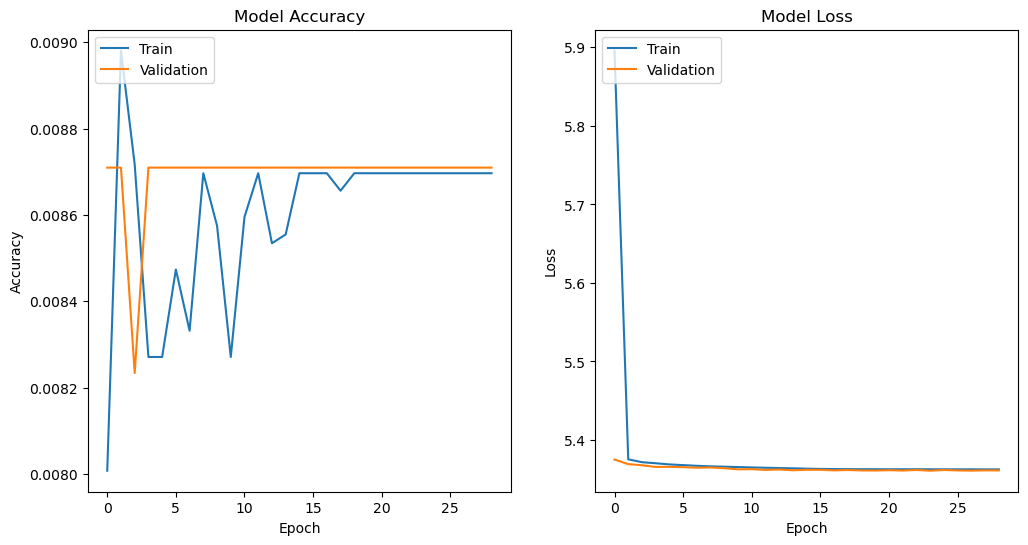

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()